# Setup

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
d = torch.load("/nfs/turbo/lsa-regier/scratch/ismael/data/blendsim.pt")

In [ ]:
snr = d['residuals']['snr']
bld = d['residuals']['blendedness']

# Flux

In [ ]:
tflux = d['residuals']['true_fluxes']
pflux = d['residuals']['est_fluxes']

(-2.0, 2.0)

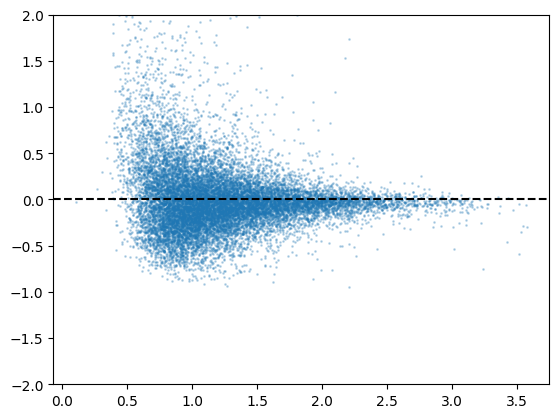

In [ ]:
plt.scatter(np.log10(snr), (pflux - tflux)/tflux, alpha=0.25, s=1.0)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-2, 2)

(-1.0, 2.0)

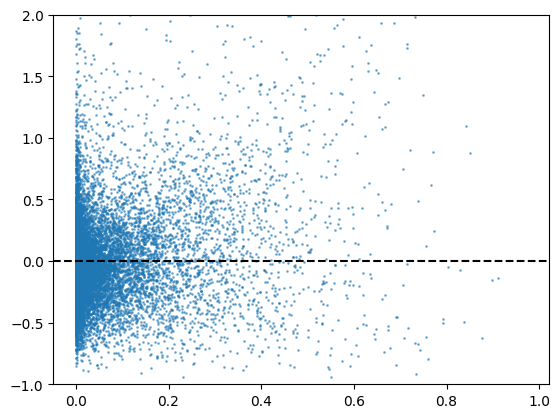

In [ ]:
plt.scatter(bld, (pflux - tflux)/tflux, alpha=0.5, s=1)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-1, 2)

# Ellipticities

In [ ]:
tellips = d['residuals']['true_ellips']
pellips = d['residuals']['est_ellips']

te1 = tellips[:, 0]
te2 = tellips[:, 1]

pe1 = pellips[:, 0]
pe2 = pellips[:, 1]

Text(0.5, 1.0, "True ellipticity of blends' member galaxies")

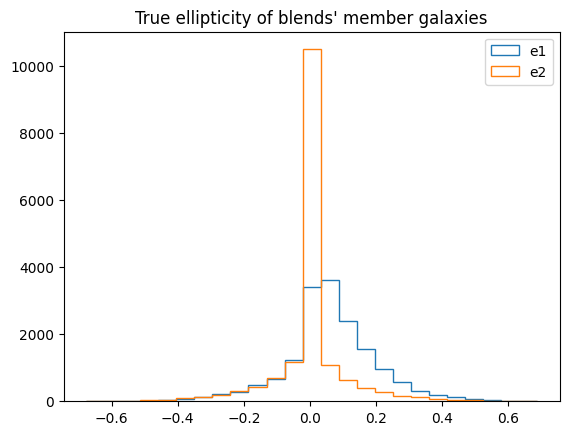

In [ ]:
_, bins, _ = plt.hist(te1, bins=25, histtype='step', label='e1')
plt.hist(te2, bins=bins, histtype='step', label='e2')
plt.legend()
plt.title("True ellipticity of blends' member galaxies")

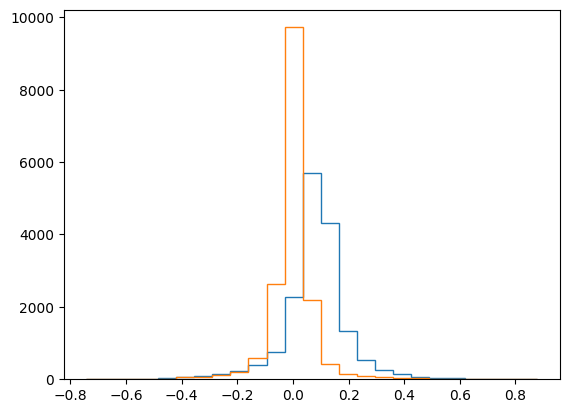

In [ ]:
_, bins, _ = plt.hist(pe1, bins=25, histtype='step')
plt.hist(pe2, bins=bins, histtype='step');

In [ ]:
# count nan's
print(sum(np.isnan(te1)), sum(np.isnan(te2)), sum((te1 < 1) & (te1 > -1)), sum((te2 < 1) & (te2 > -1)), len(te1))
print(sum(np.isnan(pe1)), sum(np.isnan(pe2)), sum((pe1 < 1) & (pe1 > -1)), sum((pe2 < 1) & (pe2 > -1)), len(pe1))


tensor(0, dtype=torch.uint8) tensor(0, dtype=torch.uint8) tensor(16413) tensor(16413) 16413
tensor(1, dtype=torch.uint8) tensor(1, dtype=torch.uint8) tensor(16412) tensor(16412) 16413


(-1.0, 1.0)

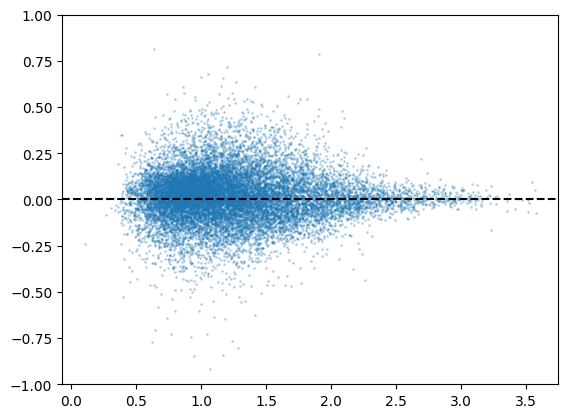

In [ ]:
plt.scatter(np.log10(snr), pe1 - te1, alpha=0.25, s=1)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-1, 1)


(-1.0, 1.0)

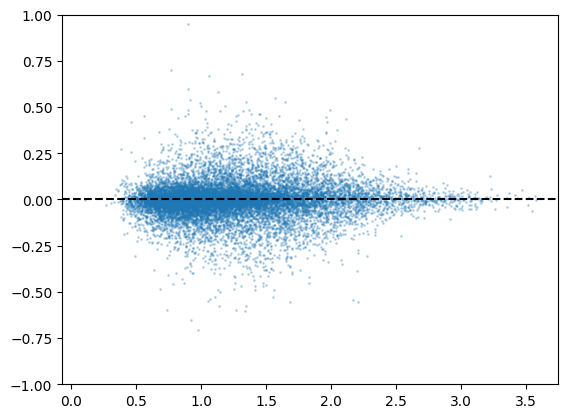

In [ ]:
plt.scatter(np.log10(snr), pe2 - te2, alpha=0.25, s=1)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-1, 1)


(-1.0, 1.0)

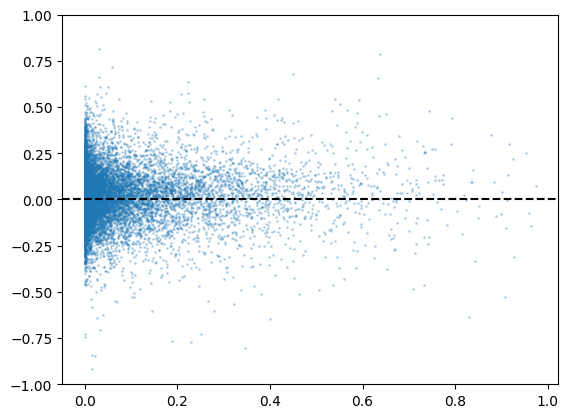

In [ ]:
plt.scatter(bld, pe1 - te1, alpha=0.25, s=1)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-1, 1)


(-1.0, 1.0)

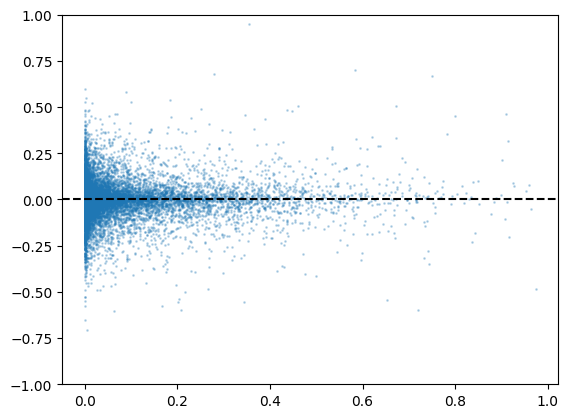

In [ ]:
plt.scatter(bld, pe2 - te2, alpha=0.25, s=1)
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-1, 1)


In [ ]:
from bliss.plotting import scatter_shade_plot

/home/imendoza/bliss/bliss/plotting.py:246: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  y_bin: np.ndarray = y[keep_x]


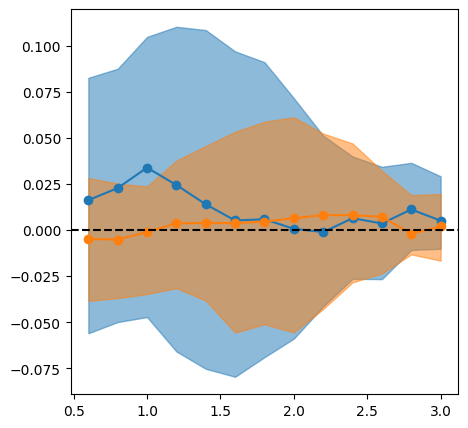

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
mask = ~pe1.isnan() & ~pe2.isnan()
scatter_shade_plot(ax, np.log10(snr)[mask], (pe1-te1)[mask], xlims=(0.5, 3), delta=0.2, color='C0')
scatter_shade_plot(ax, np.log10(snr)[mask], (pe2-te2)[mask], xlims=(0.5, 3), delta=0.2, color='C1')
plt.axhline(0.0, color='k', linestyle='--')

/home/imendoza/bliss/bliss/plotting.py:246: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  y_bin: np.ndarray = y[keep_x]


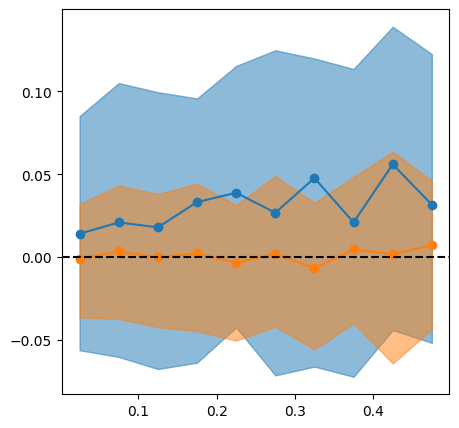

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
mask = ~pe1.isnan() & ~pe2.isnan()
scatter_shade_plot(ax, bld[mask], (pe1-te1)[mask], xlims=(0.0, 0.5), delta=0.05, color='C0')
scatter_shade_plot(ax, bld[mask], (pe2-te2)[mask], xlims=(0.0, 0.5), delta=0.05, color='C1')
plt.axhline(0.0, color='k', linestyle='--')

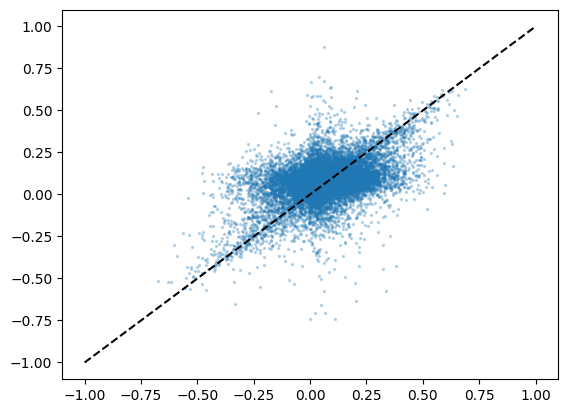

In [ ]:
plt.scatter(te1, pe1, alpha=0.25, s=2)
plt.plot([-1, 1], [-1, 1], linestyle='--', color='k')

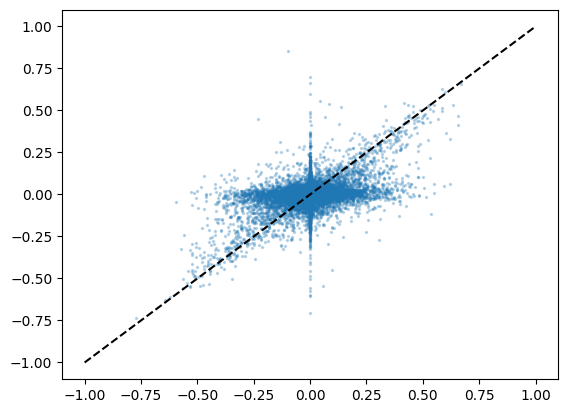

In [ ]:
plt.scatter(te2, pe2, alpha=0.25, s=2)
plt.plot([-1, 1], [-1, 1], linestyle='--', color='k')